In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
import scipy.optimize as optimization
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [63]:
%matplotlib notebook

The next cell has parameters that might change from crystal to crystal

In [64]:
# Loading in the compressed data
Segmentname = 'Segments2'
Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# Histogram accumulation
accumlist = [] # all

# Parameters for binning
Z2minforhist = 0.0
Z2maxforhist = .03
Z2offset = 0.001
nbins_max = 8
levels = 3

Segments2_compr_flat_filt.npz


In [65]:
# # Loading in the compressed data
# Segmentname = 'Segments2'
# Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# # Histogram accumulation
# accumlist = [] # all

# # Parameters for binning
# Z2minforhist = 0.0
# Z2maxforhist = .25
# Z2offset = 0.001
# nbins_max = 8
# levels = 3

In [66]:
# Derivative names
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments2_compr_flat_filt_roughness.jpg
9
2019-07-02/case2.0 (calibration)


In [67]:
# Histogram accumulation
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2minforhist,Z2maxforhist,50); Z2theory=Z2theory[1:] # This is for Weibull plots
print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8]
Z2 ranging from 0.0 to 0.03
Max number of bins specified is 8
Sturges rule says maxbins = 9
Using nbins =  8
Using levels = 3 for uncertainty analysis


Original =  435
4 0 109 [54 26 12  9  2  5  1]
4 1 109 [57 28 10  7  4  1  1]
4 2 109 [53 36 13  2  0  2  2]
4 3 108 [56 31  6  8  3  3  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.006087264123606699
statsigma =  0.07802092106356281

****Working on segment 0


<IPython.core.display.Javascript object>


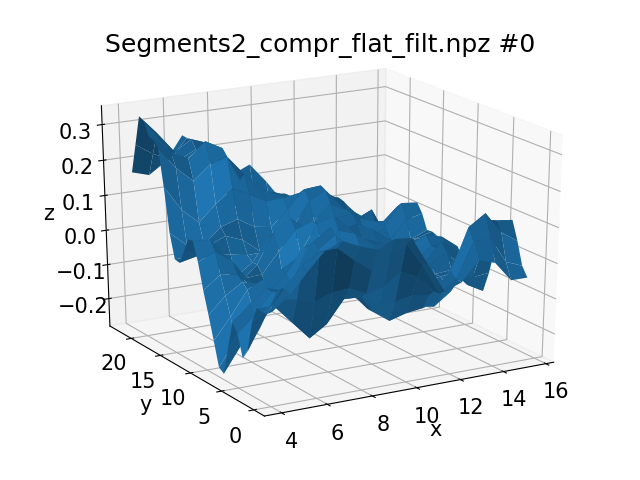

std dev of height =  0.09792631166799974
integral =  0.003174603174603175


<IPython.core.display.Javascript object>


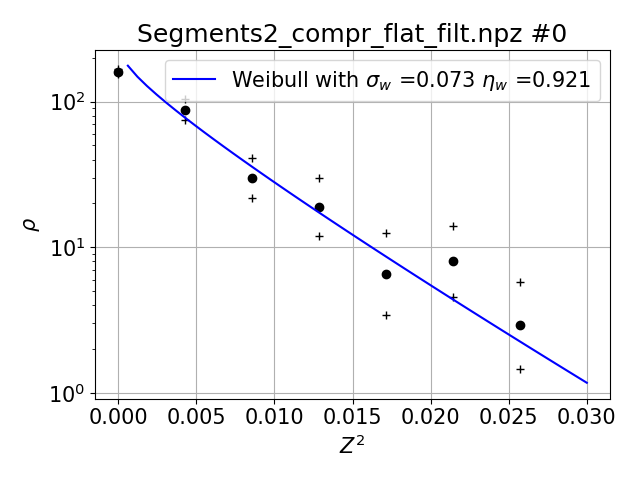

[154.26035311  75.22585974  21.93226591  12.03656249   3.43130569
   4.59219917   1.47185855]
Based on raw data: sigmaW, etaW =  0.07705341292064848 1.0213215079050284
Based on bins: sigmaW, etaW =  0.07362731324119887 0.9216680786209408
Original =  435
4 0 109 [53 24 18  9  2  1  1]
4 1 109 [55 28 13  6  5  0  2]
4 2 109 [56 33 10  6  1  3  0]
4 3 108 [50 31 15  6  5  0  1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.005932833339361671
statsigma =  0.07702488779194469

****Working on segment 1


../../../statstuff.py:502: RuntimeWarning: invalid value encountered in power
  term2 = (Z2/sigma2W)**(etaW-1)
../../../statstuff.py:503: RuntimeWarning: invalid value encountered in power
  term3 = np.exp(-(Z2/sigma2W)**etaW)


<IPython.core.display.Javascript object>


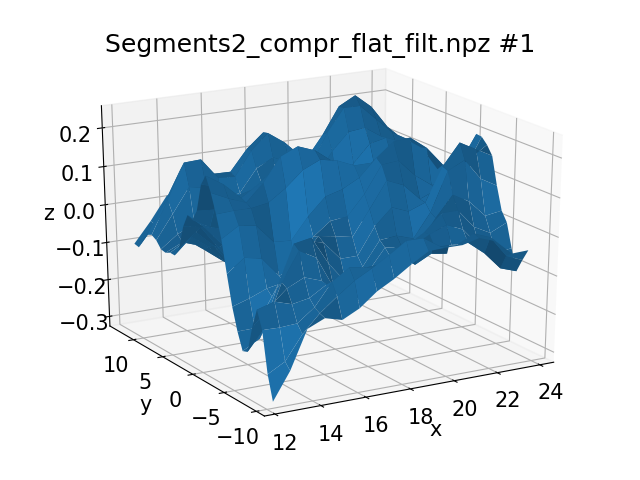

std dev of height =  0.0946837862848363
integral =  0.003209348255431205


<IPython.core.display.Javascript object>


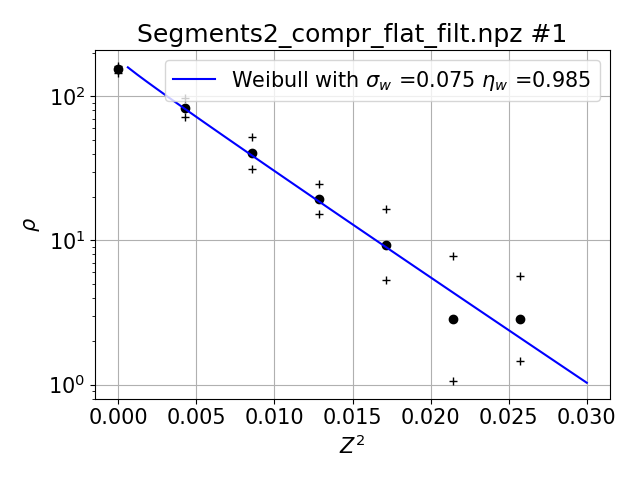

[145.01898948  71.65069347  31.18864739  15.29764276   5.29518658
   1.06354168   1.44921457]
Based on raw data: sigmaW, etaW =  0.07778540082485788 1.0800032266127748
Based on bins: sigmaW, etaW =  0.0758509840513228 0.9854035972600507
Original =  435
4 0 109 [57 24 12 10  2  3  0]
4 1 109 [62 20 17  3  2  1  2]
4 2 109 [57 32  8  6  2  2  1]
4 3 108 [54 33  7  6  4  2  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.006041864544500131
statsigma =  0.07772943164915161

****Working on segment 2


<IPython.core.display.Javascript object>


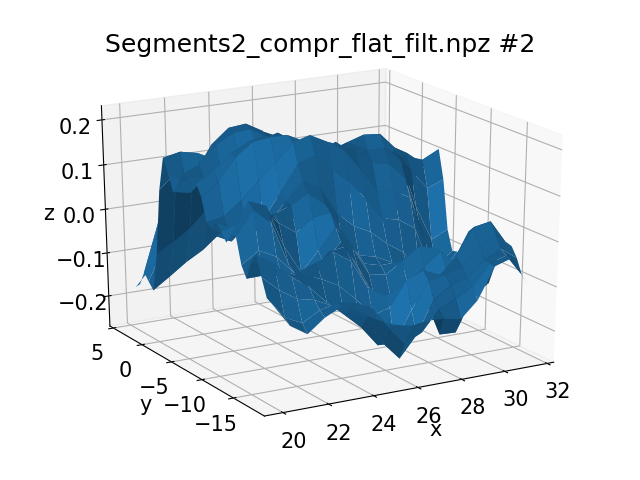

std dev of height =  0.10785526236354329
integral =  0.003117335101093802


<IPython.core.display.Javascript object>


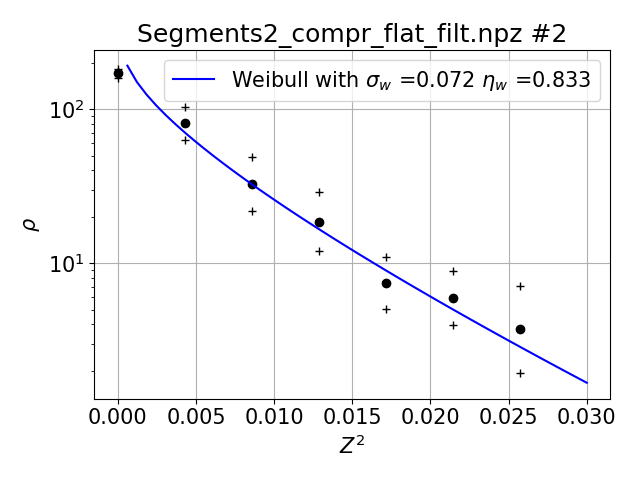

[160.08440781  63.50085003  21.87818664  11.98522174   5.02591512
   3.99398748   1.93739177]
Based on raw data: sigmaW, etaW =  0.07562738204107466 0.9880951629827668
Based on bins: sigmaW, etaW =  0.07261544393083225 0.8335037277325401
Original =  435
4 0 109 [55 30 13  4  5  0  1]
4 1 109 [58 27  9 10  3  2  0]
4 2 109 [59 25 15  5  1  3  0]
4 3 108 [58 28 16  1  1  3  1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.00572434561933337
statsigma =  0.07565940535936937

****Working on segment 3


<IPython.core.display.Javascript object>


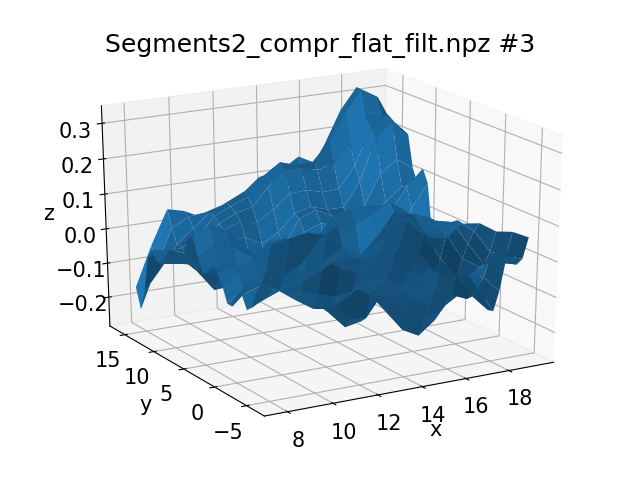

std dev of height =  0.11464330524400505
integral =  0.003137578356977896


<IPython.core.display.Javascript object>


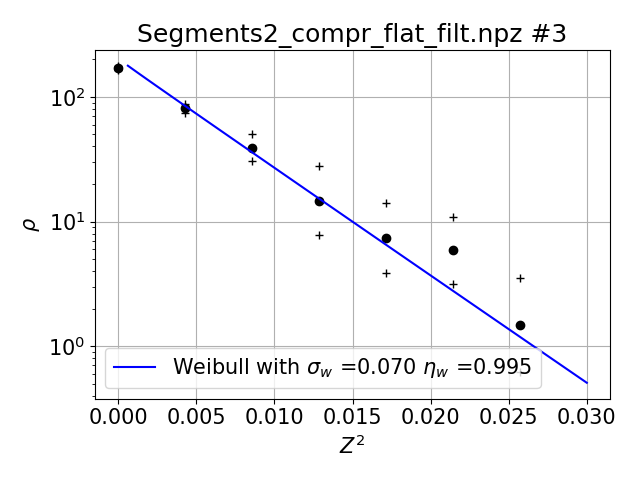

[163.37879678  74.21355425  30.45667322   7.74941853   3.83200202
   3.1828058    0.61641433]
Based on raw data: sigmaW, etaW =  0.07480923178103215 1.0146244701067981
Based on bins: sigmaW, etaW =  0.07063611043910006 0.9954283221739046
Original =  435
4 0 109 [53 27 13  8  5  3  0]
4 1 109 [55 28 10  7  6  1  2]
4 2 109 [59 20 15  6  5  3  1]
4 3 108 [52 25 14  9  3  5  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0061848649708401955
statsigma =  0.07864391248431245

****Working on segment 4


<IPython.core.display.Javascript object>


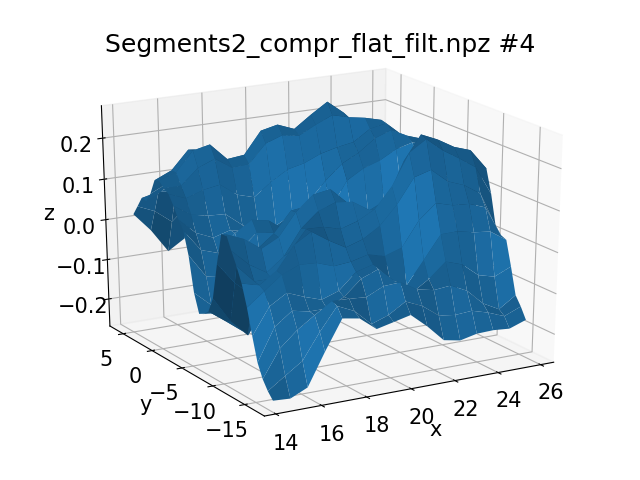

std dev of height =  0.10905499901328107
integral =  0.0031921182266009857


<IPython.core.display.Javascript object>


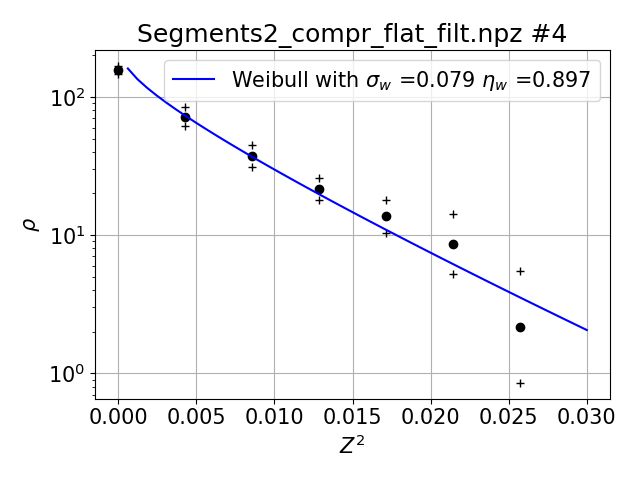

[147.67734259  61.49200727  31.21288226  17.90053083  10.37795536
   5.22358568   0.85235398]
Based on raw data: sigmaW, etaW =  0.07895097515906559 1.0189057750605943
Based on bins: sigmaW, etaW =  0.07908756549451586 0.8979402071593199
Original =  435
4 0 109 [35 28 17 10  7  5  3]
4 1 109 [35 25 18  6  5  6  5]
4 2 109 [32 18 20 14 10  4  4]
4 3 108 [36 27 14  5 12  7  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.010529858481234559
statsigma =  0.10261509870011605

****Working on segment 5


<IPython.core.display.Javascript object>


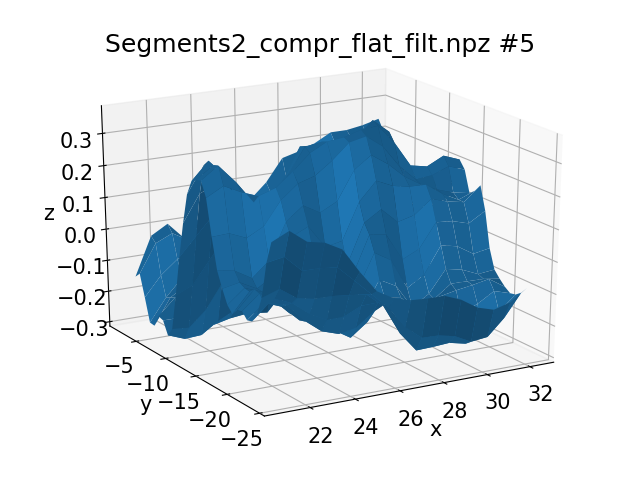

std dev of height =  0.15885950009782002
integral =  0.0034847434119278783


<IPython.core.display.Javascript object>


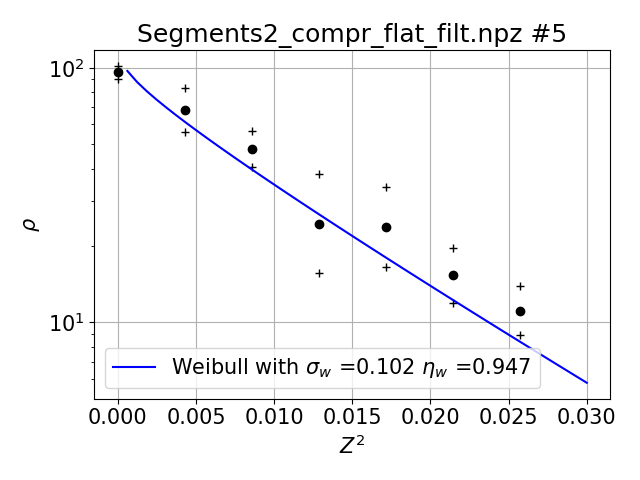

[90.64810951 55.89145134 40.92844746 15.57589324 16.44836719 11.9508864
  8.94831406]
Based on raw data: sigmaW, etaW =  0.09697278133721389 1.115931220538536
Based on bins: sigmaW, etaW =  0.1029204035027767 0.9472775870282544
Original =  435
4 0 109 [48 27 19  7  2  2  1]
4 1 109 [46 31 14  9  1  3  4]
4 2 109 [52 24 15  7  3  5  1]
4 3 108 [46 31 13 10  2  1  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007283911909691274
statsigma =  0.08534583709643531

****Working on segment 6


<IPython.core.display.Javascript object>


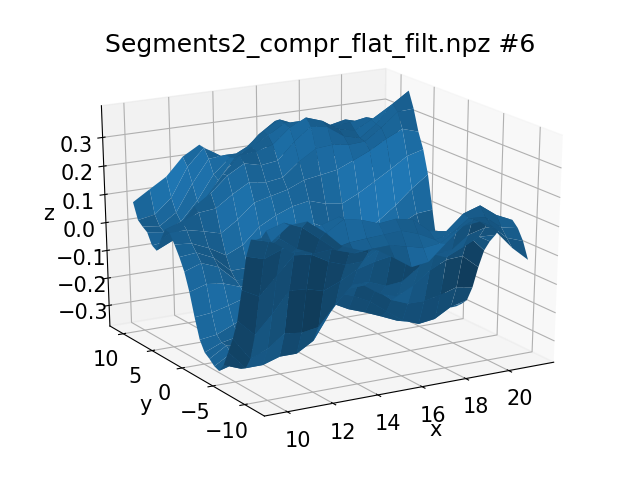

std dev of height =  0.18907211732351104
integral =  0.003285040431266847


<IPython.core.display.Javascript object>


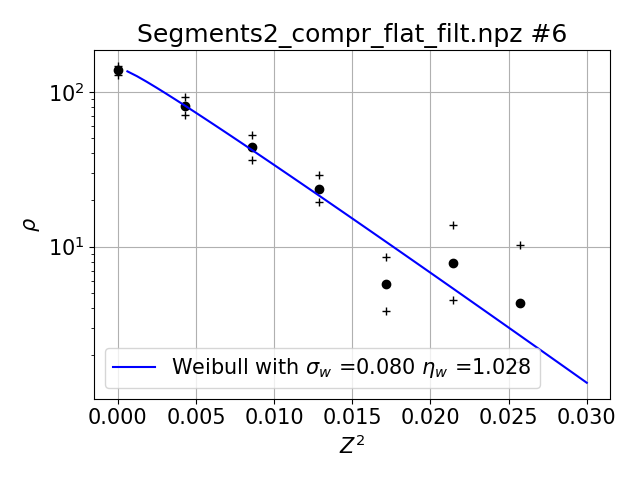

[128.72683158  70.86423963  36.27406354  19.44242076   3.85266177
   4.52154995   1.80372315]
Based on raw data: sigmaW, etaW =  0.08154155651355487 1.048107841843597
Based on bins: sigmaW, etaW =  0.08054327236881159 1.0287287579498248
Original =  435
4 0 109 [48 27 17  2  5  3  3]
4 1 109 [46 31  8 12  7  2  3]
4 2 109 [46 28 15 13  2  2  0]
4 3 108 [46 24 17 11  2  3  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007657927851940187
statsigma =  0.08750958720014732

****Working on segment 7


<IPython.core.display.Javascript object>


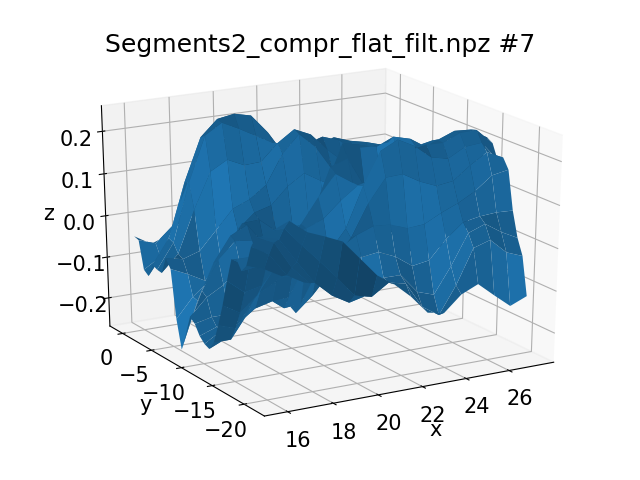

std dev of height =  0.11236120796697116
integral =  0.0033075630252100844


<IPython.core.display.Javascript object>


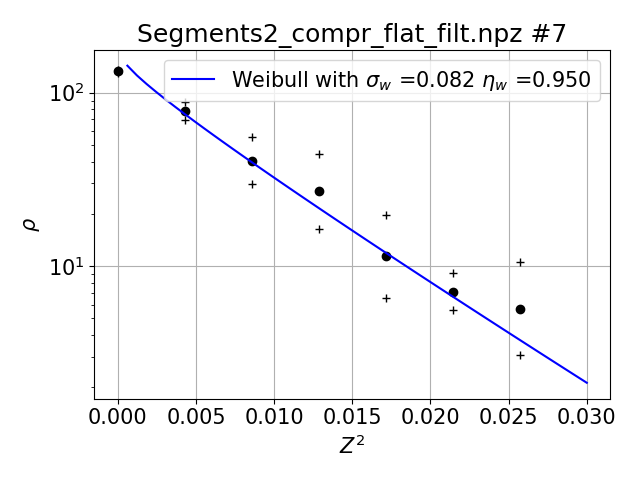

[128.98229557  69.48312028  29.80612196  16.47182406   6.55570079
   5.56791899   3.07606536]
Based on raw data: sigmaW, etaW =  0.08465342022791644 1.0644630474515109
Based on bins: sigmaW, etaW =  0.08227854694102589 0.9502550439342049
Original =  435
4 0 109 [42 32 14  7  7  2  1]
4 1 109 [46 32  8  9  5  5  2]
4 2 109 [51 16 18 10  9  3  1]
4 3 108 [46 26 10 12  5  5  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007881337086513835
statsigma =  0.08877689500378932

****Working on segment 8


<IPython.core.display.Javascript object>


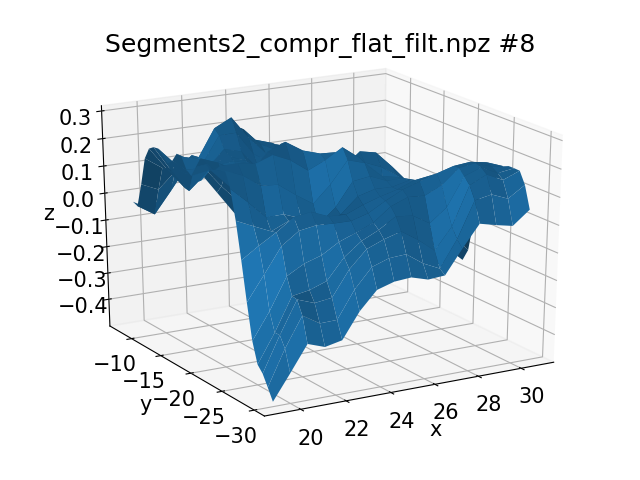

std dev of height =  0.14173537225144833
integral =  0.003324949698189135


<IPython.core.display.Javascript object>


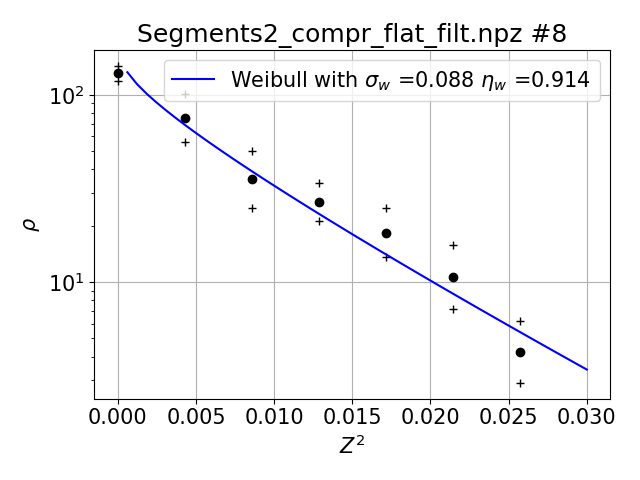

[119.19125282  55.74316325  24.74547297  21.23416774  13.55518343
   7.15109405   2.89593748]
Based on raw data: sigmaW, etaW =  0.08542490333259081 0.9947716567268132
Based on bins: sigmaW, etaW =  0.08839030470996291 0.9140604391084515


In [68]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# First-guess for Weibull fitting (sigma2W, etaW)
x0 = np.array([.1,.9])

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Reporting
        print('')
        print('****Working on segment', isegment)
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title(title)
        ax.view_init(azim=-120,elev=22)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Eliminate entries greater than a threshold (not sure if this is necessary)
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])

        # Attempt a best-fit based on the raw data
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        print('Based on raw data: sigmaW, etaW = ', sigmaW, etaW)
        
        # Attempt a best-fit based on the bins
        errors = np.log(countsplus/counts); #print(errors)
        solution, solutionerror = optimization.curve_fit(sts.logWeibull, bins+Z2offset, np.log(counts),x0,sigma=errors)
        etaW = solution[1]
        sigma2W = solution[0]
        sigmaW = np.sqrt(sigma2W)
        print('Based on bins: sigmaW, etaW = ', sigmaW, etaW)
        
        # Graph the best-fit probability
        myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

In [69]:
# Sum up the accumulated information
# Naccum, Laccum = np.shape(Z2flat_list)
# Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
#ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
#Z2flat_new = np.squeeze(Z2flat_total[ikeep])
Z2flat_new = np.squeeze(Z2flat_total)
# ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
# Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; #print(countsminus)

# Attempt a best-fit based on the raw data
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W)
print('Based on raw data: sigmaW, etaW = ', sigmaW, etaW)

# Attempt a best-fit based on the bins
errors = np.log(countsplus/counts); #print(errors)
solution, solutionerror = optimization.curve_fit(sts.logWeibull, bins+Z2offset, np.log(counts),x0,sigma=errors)
etaW = solution[1]
sigma2W = solution[0]
sigmaW = np.sqrt(sigma2W)
print('Based on bins: sigmaW, etaW = ', sigmaW, etaW)

Original =  435
4 0 109 [42 32 14  7  7  2  1]
4 1 109 [46 32  8  9  5  5  2]
4 2 109 [51 16 18 10  9  3  1]
4 3 108 [46 26 10 12  5  5  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007881337086513835
statsigma =  0.08877689500378932
integral =  0.003324949698189135
Based on raw data: sigmaW, etaW =  0.08346911126179632 0.9777827797384966
Based on bins: sigmaW, etaW =  0.08839030470996291 0.9140604391084515


../../../statstuff.py:502: RuntimeWarning: invalid value encountered in power
  term2 = (Z2/sigma2W)**(etaW-1)
../../../statstuff.py:503: RuntimeWarning: invalid value encountered in power
  term3 = np.exp(-(Z2/sigma2W)**etaW)


<IPython.core.display.Javascript object>


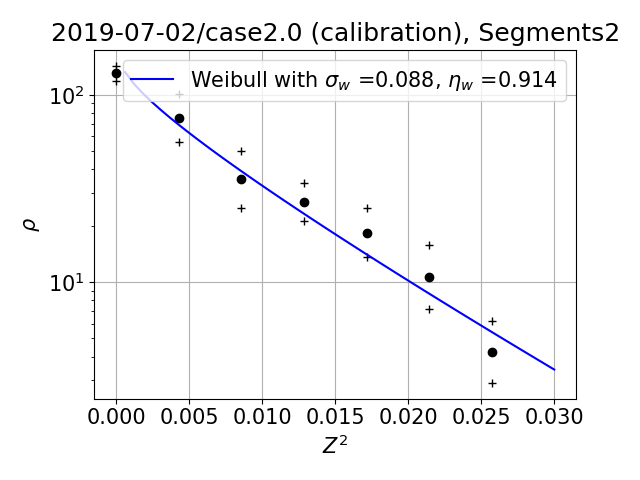

In [70]:
# Graph the probability
plt.figure()
fontsize = 15
plt.rcParams.update({'font.size': fontsize})
plt.semilogy(bins, counts, 'ok')
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder + ', ' + Segmentname)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b', \
             label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ', $\eta_w$ =' + str(etaW)[0:5])
plt.legend(fontsize=fontsize)

In [71]:
plt.savefig(Roughnessfilename)